# Notebook SAE 202

### Partie I


Chargement du fichier audio et import des librairies pour la suite du Notebook 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import soundfile as sf

file ="NR4.wav"

data, samplerate = sf.read(file)


Affichage de la tranche du signal et ça FFT

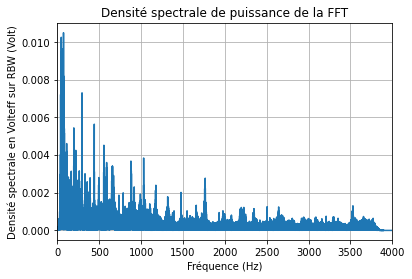

In [23]:
tranche = data[int(1*samplerate):int(20000*samplerate)]

N = len(tranche)
tfft = N*samplerate

# FFT Billatérale
fft = (1/N)*(np.fft.fft(tranche))

# Calcul de la FFT Monolatérale
fft_mono = np.concatenate((fft[0:1], 2*fft[1:int(N/2)]))
# On calcul la valeur absolue de fft_mono pour obtenir la fft monolatérale
fft_mono_abs = np.abs(fft_mono)


# Calcul de la Densité spectrale en Volt efficace sur RBW
fft_mono_eff = fft_mono_abs/np.sqrt(2)

# Calcul de la Densité spectrale en dBm sur RBW
fft_mono_dbm = 10*np.log10(np.square(fft_mono_eff)/50*1000)

# Calcul de la plage de fréquence pour la FFT
f_tranche = np.arange(0, samplerate/2, samplerate/N)


# Affichage de la FFT
plt.figure()
plt.plot(f_tranche, fft_mono_eff)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Densité spectrale en Volteff sur RBW (Volt)')
plt.title('Densité spectrale de puissance de la FFT')
# affichage entre 0 et 1K Hz
plt.xlim(0, 4000)
plt.grid()
plt.show()



Calcul de la largeur de bande du signal

In [25]:
#on récupère les fréquences
f_max = np.max(f_tranche)
f_min = np.min(f_tranche)

# Calcul de la bande de fréquences
bandwidth = f_max - f_min

print(bandwidth)


49999.97435897436


Fréquence d'échantillonnage, nombre de bit de codage et le nombre de niveau de quantification.

In [27]:
print(f"La fréquence d'échantillonnage est : {samplerate} Hz")



TypeError: can only concatenate str (not "int") to str